In [1]:
import os
import tensorflow as tf
#os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" #If the line below doesn't work, uncomment this line (make sure to comment the line below); it should help.
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [2]:
import os
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.16.1'

In [3]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
dataset_path = os.path.join(os.getcwd(), './', 'seeds.txt')

df = pd.read_csv(dataset_path, 
                lineterminator='\n', 
                sep='\t+|\t\t',
                engine='python', 
                header=None,
                names=['area', 'perimeter', 'compactness', 'length of kernel', 'width of kernel', 'asymmetry coefficient', 'length of kernel groove', 'class']
            )

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area                     210 non-null    float64
 1   perimeter                210 non-null    float64
 2   compactness              210 non-null    float64
 3   length of kernel         210 non-null    float64
 4   width of kernel          210 non-null    float64
 5   asymmetry coefficient    210 non-null    float64
 6   length of kernel groove  210 non-null    float64
 7   class                    210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


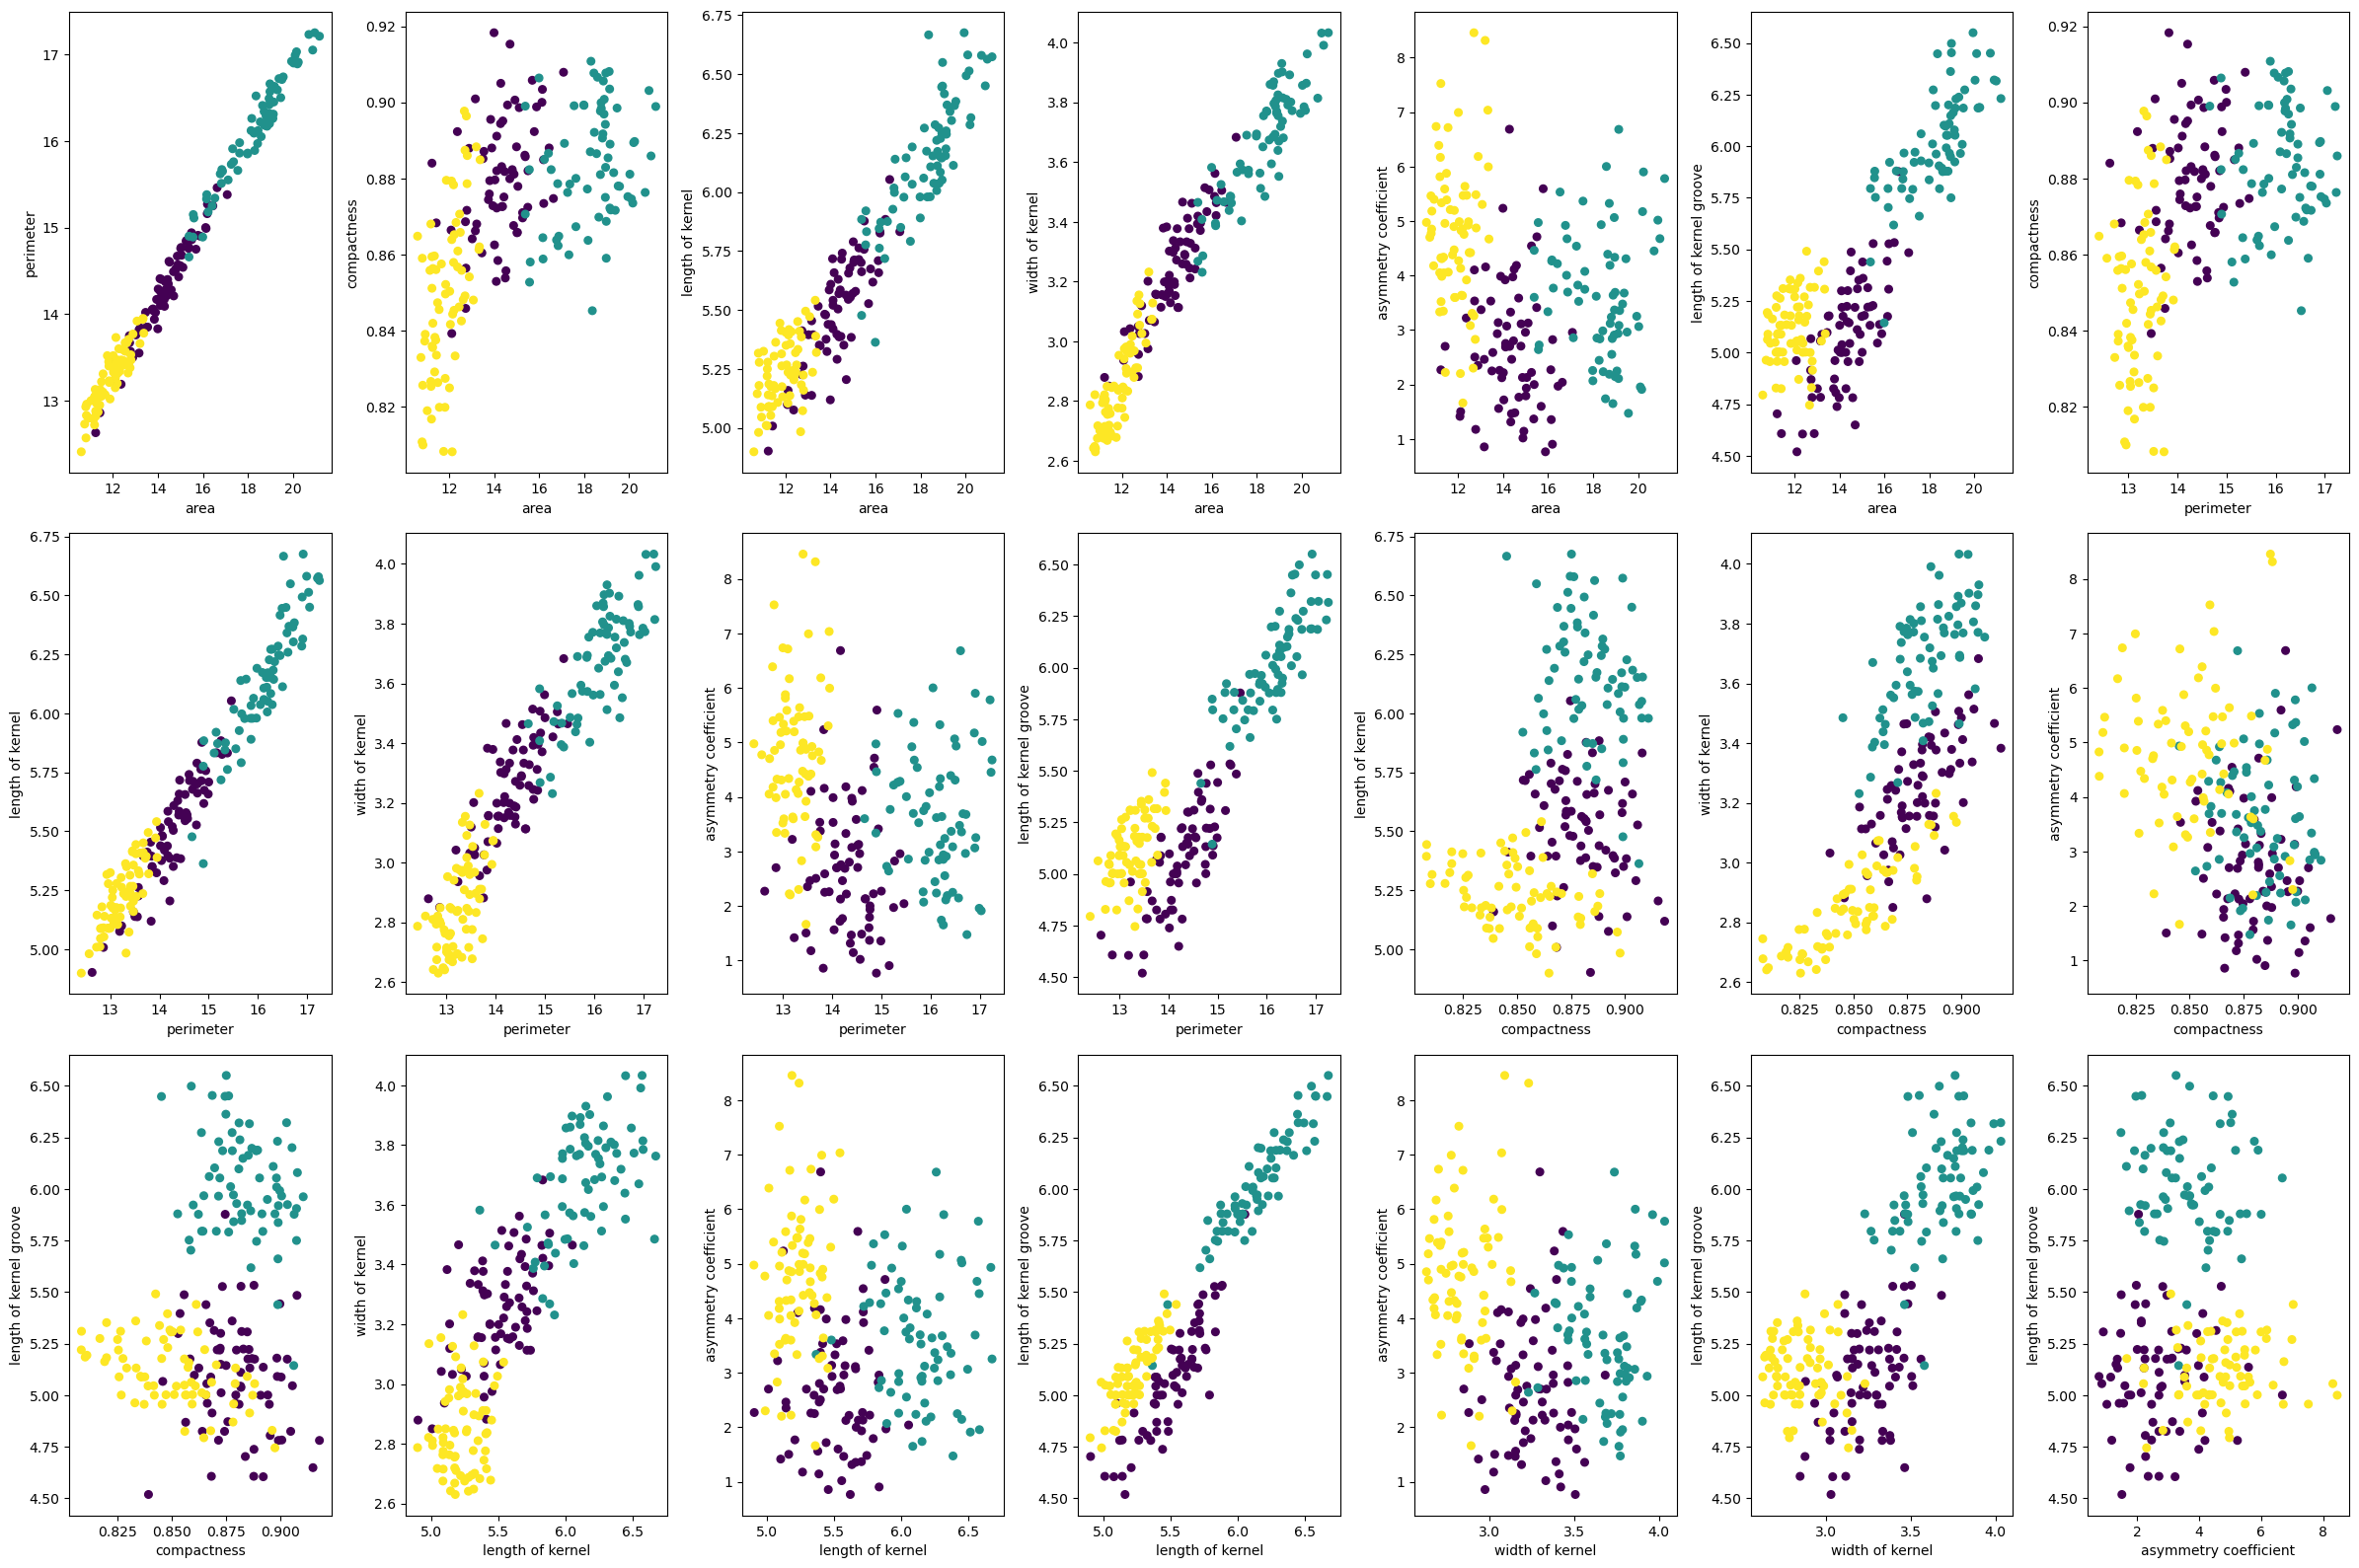

In [5]:
fig, ax = plt.subplots(figsize=(24, 16), nrows=3, ncols=7)

cnt = 0
for i in range(7):
    for j in range(i + 1, 7):
        curr_ax = ax[cnt // 7, cnt % 7]
        curr_ax.scatter(df[df.columns[i]], df[df.columns[j]], c=df['class'], cmap='viridis', s=30)
        curr_ax.set_xlabel(df.columns[i])
        curr_ax.set_ylabel(df.columns[j])
        cnt += 1

fig.tight_layout()

In [6]:
for column in df.columns:
    df[column] = (df[column] - df[column].mean()) / df[column].std()

In [7]:
df

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,class
0,0.141759,0.214949,0.000060,0.303493,0.141364,-0.983801,-0.382663,-1.221825
1,0.011161,0.008204,0.427494,-0.168223,0.196962,-1.783904,-0.919816,-1.221825
2,-0.191609,-0.359342,1.438945,-0.761817,0.207552,-0.665888,-1.186357,-1.221825
3,-0.346264,-0.474200,1.036904,-0.687336,0.318747,-0.958528,-1.227051,-1.221825
4,0.444196,0.329807,1.371233,0.066507,0.803240,-1.559768,-0.474223,-1.221825
...,...,...,...,...,...,...,...,...
205,-0.913333,-1.040834,0.308997,-1.109397,-0.734959,-0.046025,-1.094797,1.221825
206,-1.243264,-1.285864,-0.842110,-1.102626,-1.227395,0.415547,-0.824186,1.221825
207,-0.566218,-0.688602,0.732199,-0.885953,-0.070436,3.069254,-0.716349,1.221825
208,-1.033620,-1.033176,-0.799790,-1.023631,-1.118847,-0.067973,-0.740765,1.221825


In [8]:
non_overfitting_model = keras.Sequential([
    keras.Input(shape=(7,)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(3, activation='sigmoid')
])

In [9]:
non_overfitting_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 153 (612.00 B)

 Trainable params: 153 (612.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
labels = (df['class'] - 1).to_numpy().reshape(-1, 1)

In [12]:
non_overfitting_model.compile(optimizer='adam',
                              loss='mse',
                              metrics=['accuracy'])

non_overfitting_model.fit(df.drop('class', axis=1),
                          tf.one_hot(labels, 3),
                          epochs=100,
                          validation_split=0.2,
                          callbacks=[keras.callbacks.EarlyStopping(monitor='loss', patience=5),
                                     keras.callbacks.ModelCheckpoint(filepath='models/model_non_overfitting.keras', save_best_only=True),
                                     keras.callbacks.TensorBoard(log_dir='logs')]
                          )

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.1603 - loss: 0.2970 - val_accuracy: 0.0476 - val_loss: 0.3011
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1903 - loss: 0.2897 - val_accuracy: 0.0714 - val_loss: 0.2937
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.1961 - loss: 0.2864 - val_accuracy: 0.0952 - val_loss: 0.2869
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2401 - loss: 0.2767 - val_accuracy: 0.1190 - val_loss: 0.2800
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3092 - loss: 0.2718 - val_accuracy: 0.1190 - val_loss: 0.2731
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3656 - loss: 0.2633 - val_accuracy: 0.1190 - val_loss: 0.2665
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4480 - loss: 0.2584 - val_accuracy: 0.2143 - val_loss: 0.2596
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4717 - loss: 0.2535 - val_accuracy: 0.2857 - val_loss

In [14]:
model = tf.keras.models.load_model('./models/model_non_overfitting.keras')

In [15]:
batch_input_data = np.array([
    [11.02, 13.0, 0.8189, 5.325, 2.701, 6.735, 5.163],
    [12.01, 14.0, 0.9189, 2.425, 2.801, 6.835, 15.263],
    [11.02, 13, 0.8189, 5.325, 2.701, 1.735, 1.163],
    # Add more samples as needed
])

# Perform inference
batch_predictions = model.predict(batch_input_data)

# Print the batch predictions
print(batch_predictions)

# Get the predicted classes for the batch
batch_predicted_classes = np.argmax(batch_predictions, axis=1)
print(f"Predicted classes: {batch_predicted_classes + 1}")  # Adding 1 to match the original class labels (1, 2, 3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
[[0.43453783 0.45803672 0.47976133]
 [0.01148612 0.539744   0.9931389 ]
 [0.45374924 0.45652735 0.45639277]]
Predicted classes: [3 3 2]
